In [117]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Linear Regression

We are trying to get a 3D model of the slope, intercept, and its likelihood in modeling the data provided. To do this approach we will use the following equation...

$$p(y|X, w) = \prod_{i=1}^n{\frac{1}{\sqrt{2\pi}\sigma_n}\exp\big[-\frac{(y_i-x_i^Tw)^2}{2\sigma_n^2}\big]}$$

This will give us the probability of how accurately one slope and one intercept will model the data. We can try multiple random weights to get a distribution.

Below we begin by manipulating the data and preparing it for modeling.

In [118]:
df = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [119]:
# Obtains independent and dependent vectors
x = df.TV.to_numpy()
y = df.Sales.to_numpy()
x[0:5], y[0:5]

(array([230.1,  44.5,  17.2, 151.5, 180.8]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

In [120]:
# Scales vectors
x = x / x.mean()
y = y / y.mean()
x[0:5], y[0:5]

(array([1.5648537 , 0.30263359, 0.11697298, 1.03031436, 1.22957648]),
 array([1.57603851, 0.74166518, 0.66321983, 1.31930825, 0.91995008]))

### Helper Functions
These functions will help us calculate the likelihood of a random weight

In [121]:
# Likelihood of one point
def like_point(x_i, y_i, w0, w1, noise_std=1):
    scale = 1 / (math.sqrt(2 * math.pi) * noise_std)
    return scale * math.exp(-((y_i - np.matmul([1, x_i], [w0, w1])) ** 2) / (2 * noise_std ** 2))

In [122]:
# Product of all the points
def likelihood(x=x, y=y, w0=0, w1=0, noise_std=1):
    prob_points = np.vectorize(like_point)(x, y, w0, w1, noise_std=noise_std)
    return np.prod(prob_points)

In [123]:
# Random weights used and calculated with
w = np.random.normal(0, 1, size=(1000, 2))
likely = np.vectorize(likelihood)(w0=w[:,0], w1=w[:,1])
likely

array([1.07106626e-204, 7.00736703e-102, 8.38103946e-125, 1.44629173e-228,
       2.63706807e-154, 0.00000000e+000, 3.01068311e-090, 7.45198575e-125,
       0.00000000e+000, 2.34090167e-265, 1.59147522e-096, 1.02347466e-089,
       9.88913397e-099, 2.76452199e-143, 4.04838930e-125, 4.63305927e-130,
       1.03036607e-200, 0.00000000e+000, 2.19509188e-237, 1.43060288e-090,
       6.30034566e-147, 1.25551505e-118, 0.00000000e+000, 1.30643504e-160,
       1.72004884e-095, 2.90986887e-130, 0.00000000e+000, 1.52502693e-130,
       0.00000000e+000, 4.62993045e-254, 1.70077204e-098, 5.86309645e-090,
       6.55231757e-223, 5.73919235e-183, 2.17638235e-093, 2.17975115e-116,
       1.10823210e-203, 1.93597715e-235, 3.42610881e-090, 1.36118429e-207,
       0.00000000e+000, 0.00000000e+000, 7.78852719e-103, 1.19607751e-122,
       0.00000000e+000, 1.07771277e-279, 0.00000000e+000, 1.18802329e-087,
       0.00000000e+000, 2.57118209e-301, 2.14106264e-117, 1.91903608e-140,
       4.35321241e-320, 2

In [124]:
# Converts results to data frames
res = pd.DataFrame([w[:,0], w[:,1], likely]).transpose()
res.columns = ['w0', 'w1', 'likelihood']
res

,w0,w1,likelihood
0,-0.725598,0.069454,1.071066e-204
1,0.226667,0.144571,7.007367e-102
2,0.559367,-0.393489,8.381039e-125
3,-0.740547,-0.061782,1.446292e-228
4,-1.031531,0.757909,2.637068e-154
...,...,...,...
995,-1.271618,2.670368,2.917013e-159
996,0.020947,-0.579195,1.988681e-205
997,3.539578,-0.116754,0.000000e+00
998,1.437501,-1.436756,2.109813e-181


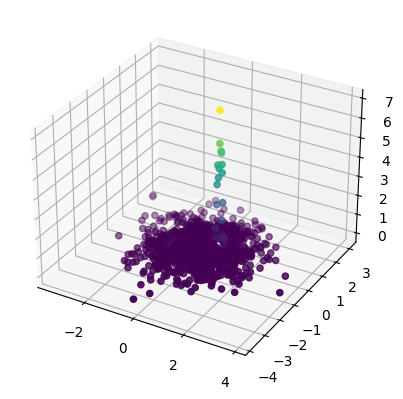

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(res.w0, res.w1, res.likelihood, c=res.likelihood, cmap='viridis')